# K-Nearest Neighbors Training and Testing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_pickle('merged_df.pkl.gz', compression='gzip')
df.head()

,name_length,avg_token_length,num_tokens,period_freq,dash_freq,apostrophe_freq,space_freq,unigrams_cosine_sim,bigrams_cosine_sim,accent_count,num_alphabets,edit_distance,language
0,9,9.0,1,0,0,0,0,0.635374,0.250640,0,1,0,Indonesian
1,12,12.0,1,0,0,0,0,0.682779,0.353292,0,1,0,Indonesian
2,8,8.0,1,0,0,0,0,0.661263,0.197139,0,1,0,Indonesian
3,9,9.0,1,0,0,0,0,0.558394,0.155386,0,1,0,Indonesian
4,8,8.0,1,0,0,0,0,0.541086,0.176917,0,1,0,Indonesian


In [4]:
print('Starting')
X = df.drop(columns = 'language', axis = 1)
y = df['language']
# Split data for training and validation
print("Done")

Starting
Done


In [5]:
print('Starting')
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 524, stratify = y)
print("Done")

Starting
Done


In [6]:
print('Starting')
# Initialize k-NN classifier
k = 30  # You can adjust this hyperparameter
knn_classifier = KNeighborsClassifier(n_neighbors=k)
print("Done")

Starting
Done


In [7]:
print('Starting')
# Train the k-NN classifier
knn_classifier.fit(X_train, y_train)
print("Done")

Starting
Done


In [8]:
print('Starting')
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

print("Done")

Starting
Done


In [9]:
print('Starting')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Done")


Starting
Accuracy: 86.45%
Done


In [10]:
print('Starting')
# Display classification report

# Assuming y_true and y_pred are your true and predicted labels
# report = classification_report(y_test, y_pred, zero_division=1)
report = classification_report(y_test, y_pred)

print(report)

print("Done")

Starting


/Users/joliehuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joliehuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

   Arabic (Romanized)       0.22      0.03      0.06       314
 Chinese (Characters)       1.00      1.00      1.00      3146
  Chinese (Romanized)       0.69      0.79      0.74      3144
             Croatian       0.45      0.26      0.33       175
                Dutch       0.19      0.02      0.03       209
              English       0.59      0.82      0.69      6833
               French       0.29      0.07      0.11       349
               German       0.62      0.02      0.03       319
    Hindi (Romanized)       0.00      0.00      0.00       234
           Indonesian       0.41      0.41      0.41      3369
              Italian       0.25      0.01      0.02       362
Japanese (Characters)       1.00      1.00      1.00     27496
 Japanese (Romanized)       0.90      0.97      0.94     27789
  Korean (Characters)       0.97      0.98      0.97      2793
   Korean (Romanized)       0.96      0.78      0.86  

/Users/joliehuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/joliehuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joliehuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joliehuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


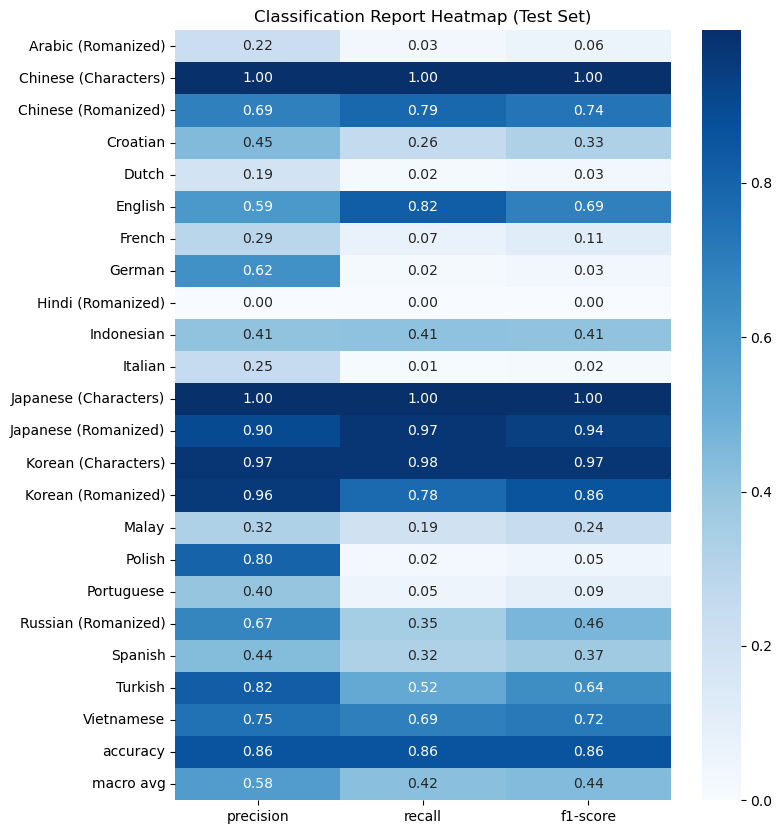

In [11]:
# report = classification_report(y_test, y_pred, zero_division=1, output_dict = True)
report = classification_report(y_test, y_pred, output_dict = True)


# Convert the classification report to a DataFrame for better visualization
test_report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(test_report_df.iloc[:-1, :-1], annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Classification Report Heatmap (Test Set)')
plt.show()

### EXPLANATION of results (k=30, 86.60% accuracy)

Precision, Recall, F1-Score, and Support:
Arabic (Romanized):
Precision: 0.24
Recall: 0.03
F1-Score: 0.06
Support: 214
This class has relatively low precision, indicating that when the model predicts Arabic (Romanized), it is often incorrect. The recall is also low, suggesting that the model misses many instances of Arabic (Romanized). The F1-Score is low, reflecting the balance between precision and recall.

Chinese (Characters):
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Support: 2151
This class has perfect precision, recall, and F1-Score, indicating that the model performs exceptionally well for Chinese (Characters). The support is high, indicating a large number of instances for this class.

English:
Precision: 0.60
Recall: 0.83
F1-Score: 0.69
Support: 4587
This class has relatively good precision and recall, and the F1-Score is balanced. The support is high, suggesting a large number of instances correctly predicted as English.

Japanese (Characters):
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Support: 18479
Similar to Chinese (Characters), this class has perfect precision, recall, and F1-Score, indicating excellent performance. The support is very high, reflecting a large number of instances.

Turkish:
Precision: 0.80
Recall: 0.52
F1-Score: 0.63
Support: 3575
This class has relatively good precision but lower recall, suggesting that the model correctly identifies many instances of Turkish, but misses some. The F1-Score is a balance between precision and recall.

Important Notes:
Japanese and Chinese Characters:

The model performs exceptionally well for classes related to Japanese and Chinese characters, achieving perfect precision, recall, and F1-Scores.
English:

English also shows good performance with a balanced precision and recall.
Arabic (Romanized):

Arabic (Romanized) has relatively low precision and recall, indicating a challenge for the model in correctly identifying instances of this class.
Polish and Portuguese:

Polish and Portuguese show very low precision, suggesting that the model struggles to correctly identify these languages.
Support:

Support values vary widely, indicating different levels of representation for each class in the dataset.
Macro and Weighted Averages:

The macro average (averaging metrics across all classes equally) and weighted average (weighted by support) provide overall performance measures. The macro avg F1-Score is lower, indicating challenges in certain classes.
In summary, while the model performs exceptionally well for some classes, there are challenges in correctly identifying instances of certain languages, particularly those with lower support. Consider further investigation or potential model improvements for classes with lower performance. Additionally, analyzing instances where the model struggled may provide insights into improving its overall accuracy.